Installing dependencies

In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.0 MB/s eta 0:00:00
Mounted at /content/gdrive


### The Practice of Deep Learning

- Deep learning can efficiently solve challenging problems with minimal code, but it's not a one-size-fits-all solution.
- Underestimating deep learning's constraints or overestimating its capabilities can lead to poor results.

#### Starting Your Project
- It's crucial to keep an open mind and explore deep learning's potential while being aware of its limitations.
- Starting a deep learning project requires having a concrete problem and accessible data.
- Don't waste time searching for the perfect dataset; instead, start quickly and iterate.
- Iterating from end to end in a project helps identify challenges and crucial aspects for improvement.
- Completing every step of a project, even with shortcuts initially, provides valuable insights and a better understanding of requirements.
- Experimentation and practice, including rewriting provided notebooks on new datasets, are essential for developing intuition in training models.
- Demonstrating a real working prototype is key to gaining organizational support for a project.
- Utilize existing data related to your field or be creative in finding similar datasets for your project.
- It's advisable to avoid branching out into entirely new areas in the beginning to ensure access to relevant examples and assistance.
- Understanding the current state of deep learning helps in choosing suitable projects and avoiding unrealistic expectations.
---

### The State of Deep Learning

- #### Computer Vision
  - Deep learning excels at object recognition, often outperforming humans.
  - Object detection and segmentation are also well-addressed.
  - Limitations exist for recognizing images different from training data.
  - Tools are developed for faster, easier, and less labeled object detection.
  - Data augmentation improves model robustness.

- #### Text (Natural Language Processing)
  - Deep learning proficient in classifying and generating text.
  - Performance similar to humans in tasks like sentiment analysis.
  - Concerns exist regarding generating correct responses.
  - Risk of misuse for generating disinformation is significant.


- #### Combining Text and Images
  - Deep learning effectively combines text and images into a single model.
  - Caution required as output correctness isn't guaranteed.
  - Suggested usage involves human interaction for enhanced accuracy.
  - Applications include medical diagnosis support and report generation.


- #### Tabular Data
  - Deep learning shows promise in analyzing time series and tabular data.
  - Often used in ensemble with other models like random forests.
  - Suitable for high-cardinality categorical and text data.
  - Training time is longer but improving with GPU acceleration.

- #### Recommendation Systems
  - Deep learning benefits recommendation systems, handling high-cardinality categorical data well.
  - Integration with natural language, images, and metadata enhances performance.
  - Challenges remain in providing truly helpful recommendations.

- #### Other Data Types
  - Domain-specific data types can fit well into existing deep learning categories.
  - NLP approaches applied to protein analysis with state-of-the-art results.
  - Spectrograms treated as images for sound analysis, leveraging standard deep learning techniques.
---

#### The Drivetrain Approach:
- Introduced by Jeremy, Margit Zwemer, and Mike Loukides in ["Designing Great Data Products."](https://www.oreilly.com/radar/drivetrain-approach-data-products/)
  - Start by defining the objective.
  - Consider actionable levers to achieve the objective.
  - Determine necessary data for better decision-making.
  - Build predictive models based on objective, levers, and available data.

- **Example: Autonomous Vehicle Model:**
  - Objective: Safely navigate from point A to point B.
  - Levers: Actions to ensure safe navigation.
  - Data: Required for informed decision-making (e.g., sensor data).
  - Predictive models integrated to predict optimal actions.

- **Example: Recommendation Systems:**
  - Objective: Drive additional sales through effective recommendations.
  - Levers: Ranking and presentation of recommendations.
  - Data: Needed for generating impactful recommendations.
  - Conduct experiments to collect diverse recommendation data.

- **Utility Function for Recommendations:**
  - Calculate purchase probabilities with and without recommendations.
  - Utility function helps assess recommendation effectiveness.
  - Consider customer preferences and purchasing behavior.

- **Implementation Challenges:**
  - Practical implementation involves more than just model training.
  - Often requires running experiments for data collection.
  - Incorporate models into the broader system development process.
---


### Gathering data
- **Gathering Data for Image Recognition:**
  - Many projects can find necessary data online.
  - Example project: Bear detector distinguishing grizzly, black, and teddy bears.
  - Various images of each bear type available online.
  - Tool provided for finding and downloading images.
  - Example projects from fast.ai course forums range from hummingbird varieties to bus types.
  
- **Using Bing Image Search:**
  - Bing Image Search recommended for finding and downloading images.
  - Free for up to 1,000 queries per month.
  - Each query can download up to 150 images.
  - Check the book's website for current recommendations and alternatives.
  
- **Staying Updated with Data Services:**
  - Data service availability changes frequently.
  - Bing Image Search API used at the time of writing.
  - Check book's website for updated information and additional options.


- Create an account on Azure and navigate to the Bing Web Search API service.
- Fill out the form provided at the given link, using "test" for both Resource Group and Instance Name.
- Choose the F1 pricing tier.
- Retrieve the API keys after the service is provisioned.

Now in the project directory:
- Create a .env file in the directory of your project.
- Add the following line to the .env file:
-     AZURE_SEARCH_KEY = "key_value"
  - (Replace "key_value" with the actual API key you obtained from Azure.)

In [11]:
# if using google colab:
from google.colab import userdata
key = userdata.get('AZURE_SEARCH_KEY')

# if you are using local/VScode
import os
key = os.getenv('AZURE_SEARCH_KEY')
print(key)

In [13]:
# Now the key is set, we can use "search_images_bing"
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [14]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
print("Number of URLs of grizzly bear images", len(ims))


Number of URLs of grizzly bear images 150


the url of the first image is:  http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg


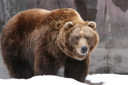

In [15]:
# these urls can be accessed using indexing eg. ims[0]

dest = 'images/grizzly.jpg'
url = ims[0]
print("the url of the first image is: ",url)

download_url(url, dest)
im = Image.open(dest)
im.to_thumb(128,128)

This seems to have worked nicely, so let's use fastai's download_images to download all the URLs for each of our search terms. We'll put each in a separate folder:

In [16]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))


# checking our folder for image files, as we'd expect:
fns = get_image_files(path)
fns

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


(#418) [Path('bears/black/e26fbaa4-ef5d-49cc-ab75-c04ba2960cb4.jpg'),Path('bears/black/5cd8eb80-6b5e-45b6-a1c3-82b5e7d83cde.jpg'),Path('bears/black/2dc24317-4960-4c96-9184-0d5648738ff1.jpg'),Path('bears/black/5a2706bb-19d0-4e52-ae62-7ebbde1186a7.jpg'),Path('bears/black/bfc6f7c7-12b7-453e-8617-c065eeb19f17.jpg'),Path('bears/black/4ec2d9d7-8900-404b-8a49-256e744489dd.jpg'),Path('bears/black/52d4102a-03a8-4e2e-b41b-90789222b2ba.jpg'),Path('bears/black/c4be55f5-bab5-469e-9544-696fc1f56cae.jpg'),Path('bears/black/a33f5b83-e59a-4cf6-af97-abb0a0ad2f90.jpg'),Path('bears/black/58f95ab1-f8f7-4927-9561-5744802179e0.jpg')...]

Often when we download files from the internet, there are a few that are corrupt. Let's check:

In [17]:
failed = verify_images(fns)
print(failed)

# To remove all the failed images, you can use unlink on each of them.
# Note that, like most fastai functions that return a collection, verify_images returns an object of type L, which includes the map method.
# This calls the passed function on each element of the collection:

failed.map(Path.unlink);

[Path('bears/black/85cc7db9-8d45-4ca8-b6ed-5186f9ebf2e3.jpg'), Path('bears/black/8b70b1a9-6a06-4aa7-ac85-b89a09ae77da.jpg'), Path('bears/black/abcb1a42-5374-4e42-b9d5-6d4b840c13a9.jpg'), Path('bears/black/100c819e-c8f2-4537-84ae-931a683cebca.jpg'), Path('bears/black/64ad6a22-3ab1-4aee-b611-3b207d679d43.jpg'), Path('bears/black/84b72815-e428-46b5-8cfd-5f686e287344.jpg'), Path('bears/teddy/4478ad22-8e9b-4e98-a1ac-5ffb504e1517.jpg'), Path('bears/teddy/81155390-d9b6-498d-bb5f-f506a94b5e0c.jpg'), Path('bears/teddy/2b892bdd-c4a8-45b4-bdd0-2d07f891714a.jpg'), Path('bears/teddy/5a84d2ad-3845-4110-be77-202cf34d3265.jpg'), Path('bears/teddy/6e5aca83-5ce2-46f9-a5c1-66107c6443c5.jpg'), Path('bears/teddy/cc832ce5-3482-40d4-9145-afb1cbb47a64.JPG'), Path('bears/teddy/6abe250d-b4d5-4968-9809-3fc28a956707.jpg'), Path('bears/teddy/d9182cef-d7a5-4858-aa10-1be699bfb6bf.jpg'), Path('bears/teddy/0b46fcf4-8b33-4c89-8114-fd51f4fe3d22.jpg'), Path('bears/teddy/87a258fa-5630-43a5-8276-12766dda015f.jpg'), Path('b

### Data to DataLoaders:
  - DataLoaders is a fastai class that stores multiple DataLoader objects passed to it, typically for training and validation.
  - It provides the data for model training.
  - Key functionality is encapsulated in a simple class with four lines of code.
  - `DataLoaders` class structure:

        class DataLoaders(GetAttr):
          def __init__(self, *loaders): self.loaders = loaders
          def __getitem__(self, i): return self.loaders[i]
          train,valid = add_props(lambda i,self: self[i])

    - `__init__(self, *loaders)`: Initializes with DataLoader objects.
    - `__getitem__(self, i)`: Returns DataLoader at index i.
    - `train` and `valid` properties: Accesses DataLoader objects.
    - **DataLoaders:** Stores DataLoader objects; typically, train and valid.
  - Relationship with other classes:
    - Later, you'll encounter Dataset and Datasets classes with similar relationships.

- **Creating DataLoaders:**
  - Four things needed to turn data into DataLoaders:
    1. Data types
    2. List of items
    3. Labeling method
    4. Validation set creation
  - In-built methods are available for common data structures and applications.
  - Data block API provides extreme flexibility for customizing DataLoaders creation.
  - Data block API allows full customization of every stage in DataLoaders creation.


In [18]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

- **DataBlock Configuration:**
  - `blocks=(ImageBlock, CategoryBlock)`: Specifies types for independent and dependent variables.
    - Independent variables: Images.
    - Dependent variables: Categories (type of bear).
  - `get_items=get_image_files`: Function to retrieve list of file paths.
  - `splitter=RandomSplitter(valid_pct=0.2, seed=42)`: Defines training/validation split.
    - Randomly splits with 20% validation set, fixing seed for reproducibility.
  - `get_y=parent_label`: Function to create labels (dependent variables) based on folder names.
    - Uses `parent_label` to extract folder names for labels.
  - `item_tfms=Resize(128)`: Resize transform to ensure uniform image sizes for model input.


In [19]:
# We still need to tell fastai the actual source of our data—in this case, the path where the images can be found:
dls = bears.dataloaders(path)

- **DataLoaders in fastai:**
  * Includes both validation and training DataLoaders.
  * DataLoader class provides batches of a few items at a time to the GPU.
  * Looping through a DataLoader provides 64 (by default) items at a time, stacked into a single tensor.
  * To inspect items, the show_batch method can be called on a DataLoader.

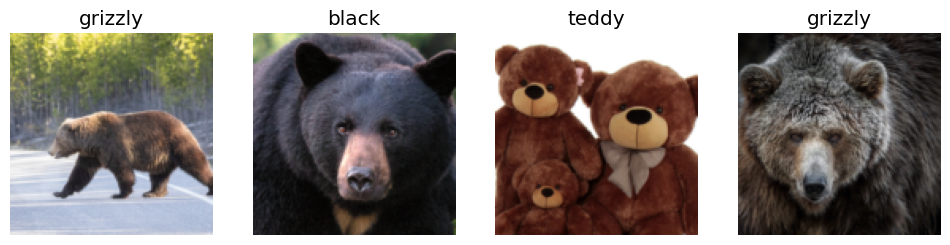

In [20]:
dls.valid.show_batch(max_n=4, nrows=1)

# the images obtained are not exact as they are.
#They have been cropped to fit the shape, so we need to resize iamges so, all complete information is presented.

Approach 1 to deal with cropped images

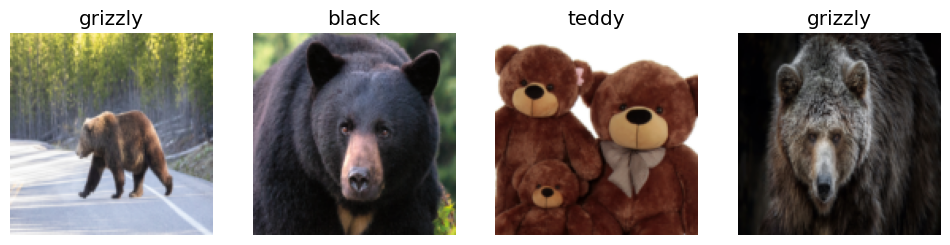

In [21]:
"""By default Resize crops the images to fit a square shape of the size requested, using the full width or height.
This can result in losing some important details. Alternatively,
you can ask fastai to pad the images with zeros (black), or squish/stretch them:
"""
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

Approach 2 to deal with cropped images

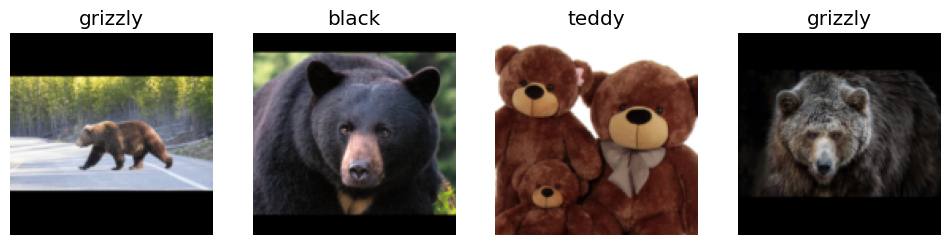

In [22]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

# we are padding the area which extra, so that iamges are as it is and we can transform them into desired shape.

- **Challenges with Image Preprocessing:**
  - Squeezing or stretching images can lead to unrealistic shapes, affecting model accuracy.
  - Cropping images may remove crucial features for recognition, like key body parts in identifying breeds of animals.
  - Padding images results in wasted computation and lower effective resolution for the useful parts.
- **Random Image Cropping:**
  - Instead of traditional preprocessing methods, randomly select parts of the image and crop to that part during training.
  - Random selection on each epoch allows the model to focus on different features and mimics real-world image variations.
- **Training Neural Networks:**
  - Untrained neural networks lack understanding of basic image properties, such as object consistency under rotation or resizing.
  - Training with varied examples helps neural networks grasp fundamental concepts of object representation in images.

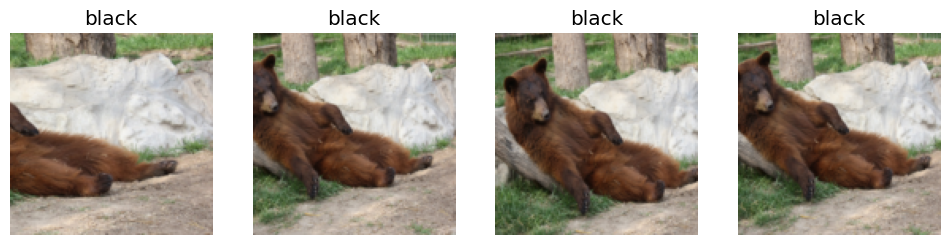

In [23]:
"""
Here's another example where we replace Resize with RandomResizedCrop,
which is the transform that provides the behavior we just described.
The most important parameter to pass in is min_scale, which determines how much of the image to select at minimum each time:"""

bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

# We used unique=True to have the same image repeated with different versions of this RandomResizedCrop transform.
# This is a specific example of a more general technique, called data augmentation.

### Data Augmentation:
  - Refers to creating random variations of input data without changing its meaning.
  - Common techniques include rotation, flipping, perspective warping, brightness, and contrast changes.
  - For natural photo images, standard augmentations are provided with the `aug_transforms` function.
  - Applying augmentations to entire batches using GPU can significantly save time.
  - Use the `batch_tfms` parameter in fastai to apply transforms on batches.
  - Example doesn't use `RandomResizedCrop` and doubles the amount of augmentation for clarity.

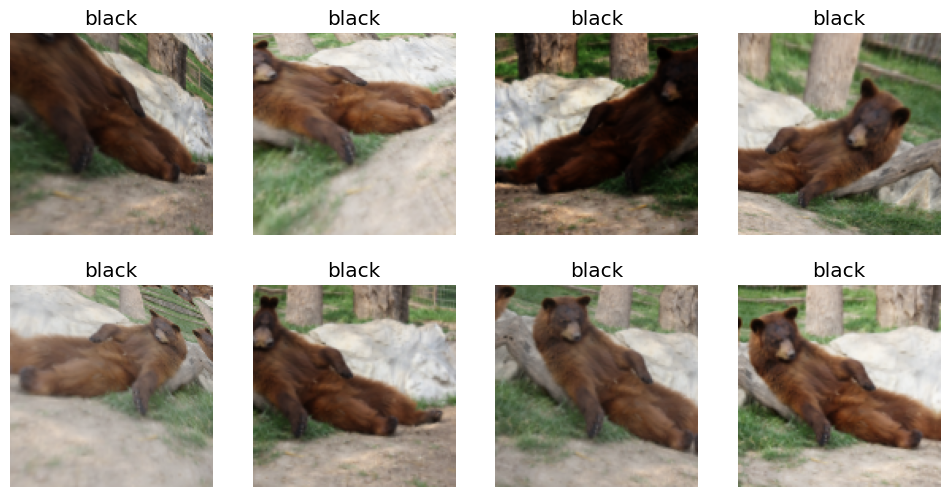

In [24]:
# make sure the gpu has been initialized

bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

### Training Your Model, and Using It to Clean Your Data

We don't have a lot of data for our problem (150 pictures of each sort of bear at most), so to train our model, we'll use RandomResizedCrop with an image size of 224 px, which is fairly standard for image classification, and default aug_transforms:

In [25]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

#  We can now create our Learner and fine-tune it in the usual way:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 141MB/s]


Now let's see whether the mistakes the model is making are mainly thinking that grizzlies are teddies (that would be bad for safety!), or that grizzlies are black bears, or something else. To visualize this, we can create a confusion matrix:

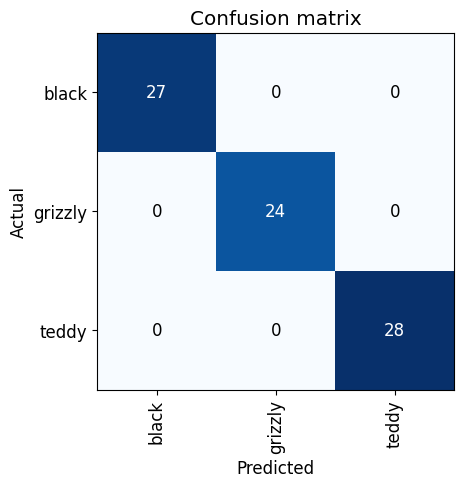

In [26]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

- **Confusion Matrix Interpretation:**
  - Rows represent black, grizzly, and teddy bears in the dataset.
  - Columns represent predicted classifications.
  - Diagonal cells indicate correct classifications, off-diagonal cells represent incorrect ones.
  - Provides insight into model performance, particularly useful for validation sets.
  - Fastai enables viewing results, calculated using the validation set.
  - Aim for dark blue (correctly classified) along the diagonal, white elsewhere.
  - Indicates few mistakes made by the bear classifier.

- **Analyzing Errors:**
  - Helps identify the source of errors: dataset or model-related issues.
  - Sorting images by loss reveals error patterns.
  - Loss: higher when model is incorrect or lacks confidence in correct prediction.
  - Loss calculation and utilization in training process to be explored in detail later.
  - Plot_top_losses function displays images with highest loss.
  - Each image labeled with prediction, actual label, loss, and probability (confidence level).

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


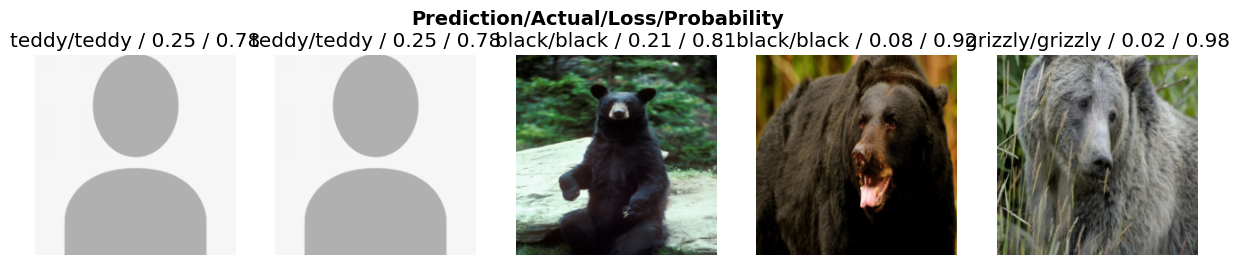

In [38]:
interp.plot_top_losses(5, nrows=1)

- The output highlights an image predicted as "grizzly" with high confidence but labeled as "black" based on Bing image search, suggesting a potential labeling error.
- While traditionally data cleaning is done before model training, this case illustrates the benefit of using a model to identify data issues more efficiently.
- It's common practice to start with training a quick and simple model, then utilize it for data cleaning tasks.
- fastai provides a convenient GUI tool called ImageClassifierCleaner for data cleaning, allowing users to select categories, training/validation sets, and view high-loss images for removal or relabeling.

In [28]:
cleaner = ImageClassifierCleaner(learn)
cleaner

- ImageClassifierCleaner identifies images for potential deletion or relabeling based on user input, returning indices of items to change.
- To delete selected images, use the indices returned by `cleaner.delete()` and unlink them.
- To move images to a different category, use the indices and corresponding categories returned by `cleaner.change()` and move them accordingly using `shutil.move()`.
- Cleaning and preparing data pose significant challenges for data scientists, consuming a substantial portion of their time.
- The fastai library aims to simplify data cleaning with user-friendly tools.
- Model-driven data cleaning examples will be further explored in the book.
- After data cleaning, retraining the model can potentially improve accuracy.
- Despite common beliefs, extensive data isn't always necessary for deep learning tasks. Cleaned datasets can achieve high accuracy even with fewer images.
- Trained models can be deployed for practical use once prepared.
---

### Creating a Basic Online Application Prototype:
  - Scope limited to basic prototype; not comprehensive web development guide.
  - Goal: Convert model into online application.

#### Using the Model for Inference:
  - Save model for deployment on a server.
  - Model comprises architecture and trained parameters.
  - Save both parts using the export method for consistent loading.
  - export method also saves DataLoader definition, ensuring consistent data transformation.
  - "export.pkl" file generated by fastai when export method is called.

In [29]:
learn.export()

In [30]:
path = Path()
path.ls(file_exts='.pkl')

- Inference in machine learning refers to using a trained model to make predictions on new data.
- The process of creating an inference learner from an exported file involves using the `load_learner` function.
- While it may not be necessary to use `load_learner` when working with an existing Learner in a notebook, it demonstrates the complete end-to-end process.

In [31]:
learn_inf = load_learner(path/'export.pkl')

When we're doing inference, we're generally just getting predictions for one image at a time. To do this, pass a filename to `predict`:

In [ ]:
learn_inf.predict('images/grizzly.jpg')

- **Returned items:**
  - Predicted category: String format as originally provided.
  - Index of predicted category: Based on the order of categories in the DataLoaders' vocabulary.
  - Probabilities of each category: Corresponds to the order of categories in the DataLoaders' vocabulary.

- **Accessing at inference time:**
  - DataLoaders can be accessed as an attribute of the Learner.
  - Enables retrieval of predicted category, index, and probabilities.


In [ ]:
learn_inf.dls.vocab

- Indexing into the vocabulary with the integer returned by the prediction yields "grizzly," confirming the expected result.
- Examining the list of probabilities reveals a nearly 1.00 probability indicating that the prediction is likely a grizzly.
- With the knowledge of making predictions from the saved model, the groundwork is laid to commence app development.
- Building the app directly within a Jupyter notebook provides a convenient starting point.

#### Creating a Notebook App from the Model:
  - Use `predict` method as a regular function to integrate the model into an application.
  - Options for creating web applications:
    - **IPython Widgets (ipywidgets):**
      - GUI components combining JavaScript and Python functionality in a web browser.
      - Can be used within Jupyter notebooks, simplifying application development.
      - Example: Image cleaner.
    - **Voilà:**
      - System for deploying applications with IPython widgets without requiring Jupyter.
      - Converts complex notebook applications into simpler, deployable web applications.
      - Utilizes Jupyter's web application foundation.
  - Leveraging ipywidgets, build a GUI step by step in the notebook.
  - Example: Creating a simple image classifier.
    - Begin with a file upload widget.


In [52]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [53]:
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

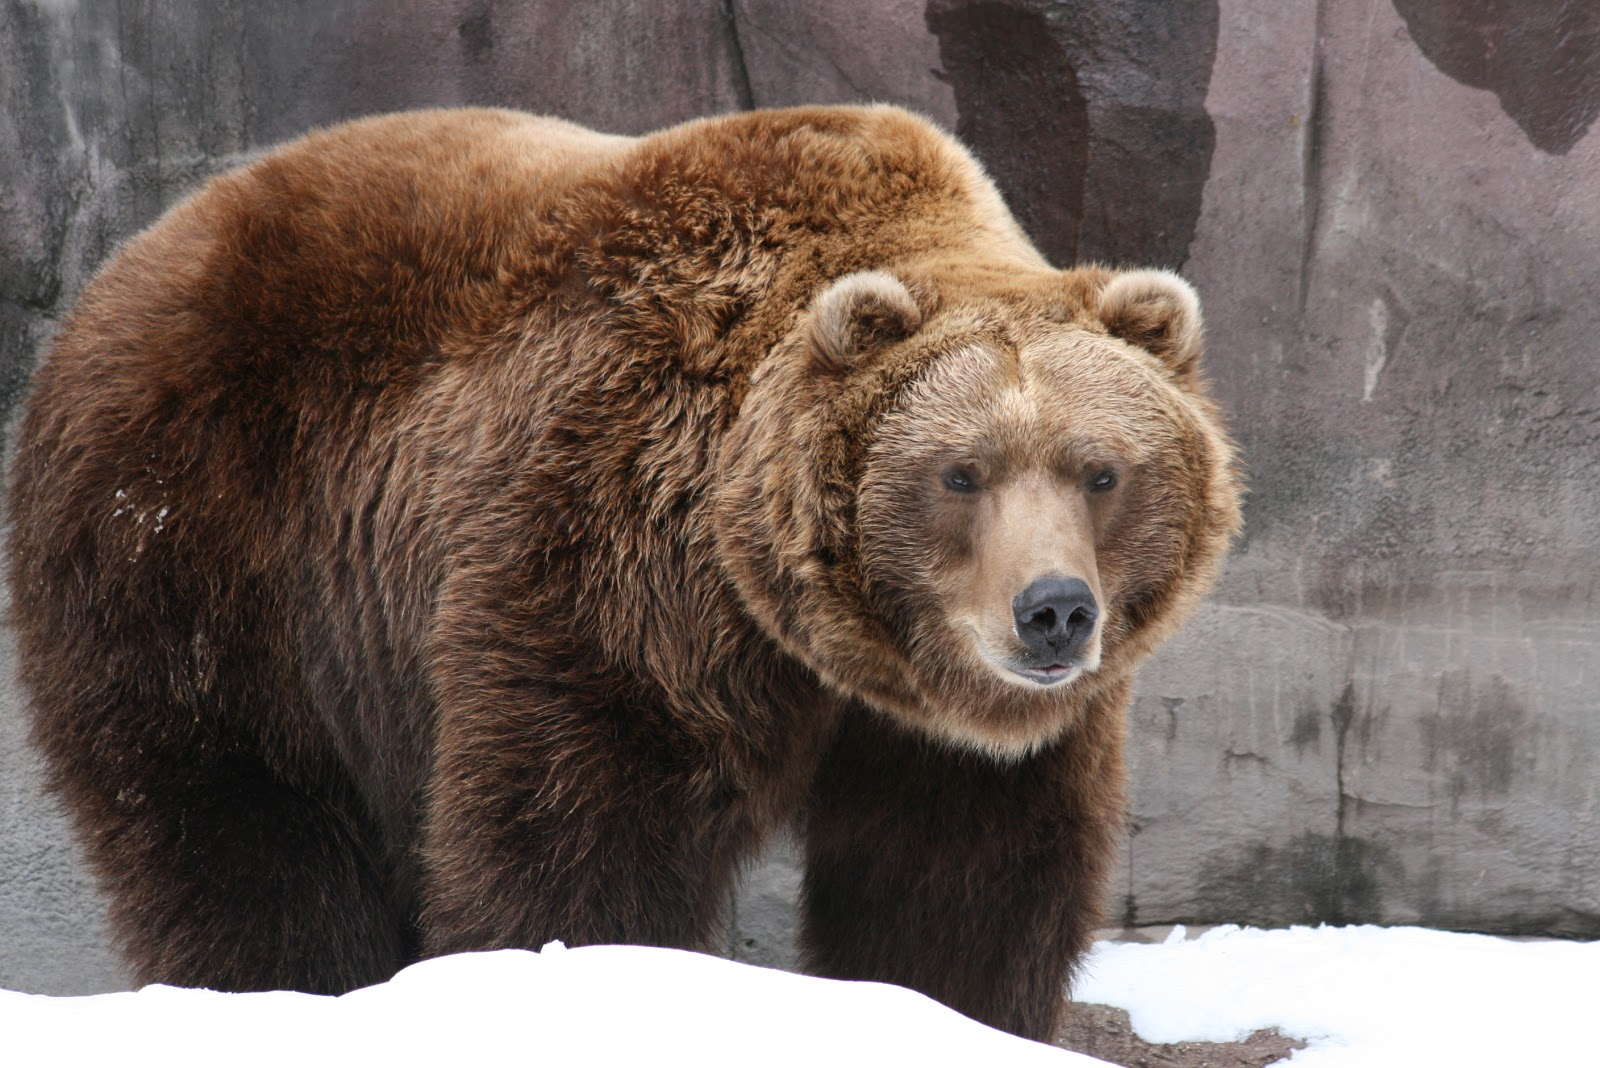

In [54]:
# Then we can get our predictions:
img = PILImage.create(btn_upload.data[-1])
img

In [55]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [56]:
pred,pred_idx,probs = learn_inf.predict(img)

In [57]:
# and use a Label to display them:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

In [58]:
# We'll need a button to do the classification. It looks exactly like the upload button:

btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [59]:
# We'll also need a click event handler; that is, a function that will be called when it's pressed.
# We can just copy over the lines of code from above:

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)


You can test the button now by pressing it, and you should see the image and predictions update automatically!

We can now put them all in a vertical box (VBox) to complete our GUI:

In [60]:
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [61]:
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])

### Turning Your Notebook into a Real App

- **Creating the Application:**
  - Start a new notebook.
  - Add code for widgets and markdown text.
  - Look at existing examples for guidance.
  
- **Installing Voilà:**

    `!pip install voila`

    `!jupyter serverextension enable --sys-prefix voila`
    
  - Use pip to install Voilà.
  - Enable Voilà server extension.
  - Voilà removes cell inputs, shows only output and markdown, creating a web application.
  
- **Deployment Considerations:**
  - **GPU Requirement:**
    - Not necessary for model serving in production.
    - GPUs are efficient for parallel tasks, not for single tasks like image classification.
  - **Alternatives:**
    - Use CPU for cost-effectiveness.
    - Batch processing on GPU requires user waiting time.
    - Tools like ONNX Runtime or AWS Sagemaker for batch processing.
  - **Complexity of GPU Inference:**
    - Requires manual memory management and queueing system.
    - CPU servers offer cheaper and simpler options.
  - **Free Hosting Options:**
    - Initial prototypes and hobby projects can be hosted for free.
    - Binder is a simple and free option.
  
### Deploying Your App to Binder

1. Add notebook to GitHub repository.
2. Paste repo URL into Binder.
3. Change File dropdown to URL.
4. Enter "/voila/render/name.ipynb" in "URL to open" field.
5. Click copy URL and launch.
6. Binder builds the site and navigates browser to the web app.
7. Share the URL for others to access.

### Mobile and Edge Device Deployment Considerations

- **Integration with Mobile Applications:**
  - Requires extra steps and boilerplate.
  - Not always compatible with all PyTorch and fastai layers.
- **Server-Based Deployment Advantages:**
  - Easier installation and upgrades.
  - Better memory and processing capacity.
  - Standard hardware support.
- **Network Connection and Latency:**
  - Requires network connection for model calls.
  - Some latency due to network communication.
- **Privacy Considerations:**
  - Sensitive data may require on-premise server deployment.
- **Complexity and Scalability:**
  - Server management and scaling can be complex.
  - Edge devices offer easier scaling with user base.

### Personal Experience: Mobile ML Landscape

- **Transition to On-Device Processing:**
  - From cloud-based to on-device models for faster processing.
  - Utilizing Apple's APIs and dedicated ML hardware.
  - Choice depends on user experience and expertise.

### Conclusion:

- **Recommendation:**
  - Start with simple CPU-based server approach.
  - Complex deployment approaches can be justified for successful applications.
- **Reflection:**
  - Pause to consider potential challenges and issues.
---


### How to Avoid Disaster

- **Deep Learning Model Integration:**
  - Deep learning models are part of larger systems in practice.
  - Deployment involves considering end-to-end processes, including model versioning, A/B testing, data refreshing, labeling, monitoring, and addressing model rot.
  - For a more detailed discussion of deployment issues we refer to you to the excellent source: [Building Machine Learning Powered Applications by Emmanuel Ameisen (O'Reilly)](http://shop.oreilly.com/product/0636920215912.do)
  
- **Model Behavior Complexity:**
  - Understanding and testing deep learning model behavior is challenging.
  - Unlike traditional software, neural networks' behavior emerges from training data rather than exact definition.

- **Potential Disasters:**
  - Example: Bear detection system faces practical challenges:
    - Video data instead of images.
    - Handling nighttime, low-resolution images.
    - Real-time result delivery.
    - Recognizing bears in uncommon positions.
  - Need for custom data collection and labeling for practical system deployment.
  
  - Out-of-Domain Data:
    - Data in production may differ significantly from training data.
    - No complete technical solution; requires careful deployment approach.
    
  - Domain Shift:
    - Over time, data types seen by the model may change.
    - Original training data may become irrelevant.
    
  - Neural Network Behavior Understanding:
    - Inability to fully understand all behaviors due to large parameter space.
    - Mitigate risks through a carefully thought-out process.
  
### Deployment Process

- **Manual Process:**
  - Initially, use manual process alongside deep learning model.
  - Human oversight to validate model outputs.
  
- **Limited Scope Rollout:**
  - Conduct small trials with limited scope and human supervision.
  - Gradually expand rollout with robust reporting systems.
  
- **Continuous Monitoring:**
  - Monitor changes in system actions compared to manual process.
  - Anticipate potential issues and include relevant measures in regular reporting.

### Unforeseen Consequences and Feedback Loops

- **Model Impact on System Behavior:**
  - Model deployment may alter system behavior.
  - Feedback loops can exacerbate biases present in the system.
  - [To predict and serve?](https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1740-9713.2016.00960.x) - "predictive policing is aptly named: it is predicting future policing, not future crime."
  
- **Predictive Policing Example:**
  - Predictive policing algorithms may perpetuate biases.
  - Biased arrest rates can worsen with algorithmic deployment.
  - [despite roughly equal usage rates, Blacks are 3.73 times more likely than whites to be arrested for marijuana.](https://www.aclu.org/issues/smart-justice/sentencing-reform/war-marijuana-black-and-white)
  - [The same technology that’s the source of so much excitement in my career is being used in law enforcement in ways that could mean that in the coming years, my son, who is 7 now, is more likely to be profiled or arrested—or worse—for no reason other than his race and where we live](https://www.nytimes.com/2017/12/02/opinion/sunday/intelligent-policing-and-my-innocent-children.html)
  
- **Considerations for Rollout:**
  - Consider extreme scenarios and potential impacts.
  - Implement ongoing monitoring and human oversight.
  - Ensure reliable communication channels for issue resolution.
